In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
import os

In [ ]:
# Set plot style and ignore warnings for cleaner output
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)
warnings.filterwarnings('ignore')

# Define the path relative to your project's root folder
file_path = '../data/01_raw/BrentOilPrices.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data from: '{file_path}'")
except FileNotFoundError:
    print(f"---! ERROR !---")
    print(f"File not found at the specified path: '{file_path}'")

Successfully loaded data from: '../data/01_raw/BrentOilPrices.csv'


In [27]:
# SETUP: Create directory for saving plots

output_dir = os.path.join('../reports', 'task-1')
output_data_dir = os.path.join('../data', '02_processed')
os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_data_dir, exist_ok=True)
print(f"Plots will be saved to: '{os.path.abspath(output_dir)}'")
print(f"Processed data will be saved to: '{os.path.abspath(output_data_dir)}'")

Plots will be saved to: 'd:\Documents\Projects\10 Academy\Week-10\Energy-Price-ChangePoint-Analysis\reports\task-1'
Processed data will be saved to: 'd:\Documents\Projects\10 Academy\Week-10\Energy-Price-ChangePoint-Analysis\data\02_processed'


In [21]:
# DATA LOADING AND PREPARATION 
file_path = os.path.join('../data', '01_raw', 'BrentOilPrices.csv')
df = pd.read_csv(file_path)

# Now, prepare the data as before
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print("\nData loaded and prepared successfully.")
print("DataFrame Head:")
print(df.head())


Data loaded and prepared successfully.
DataFrame Head:
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63



Step 2: Analyzing raw price series...


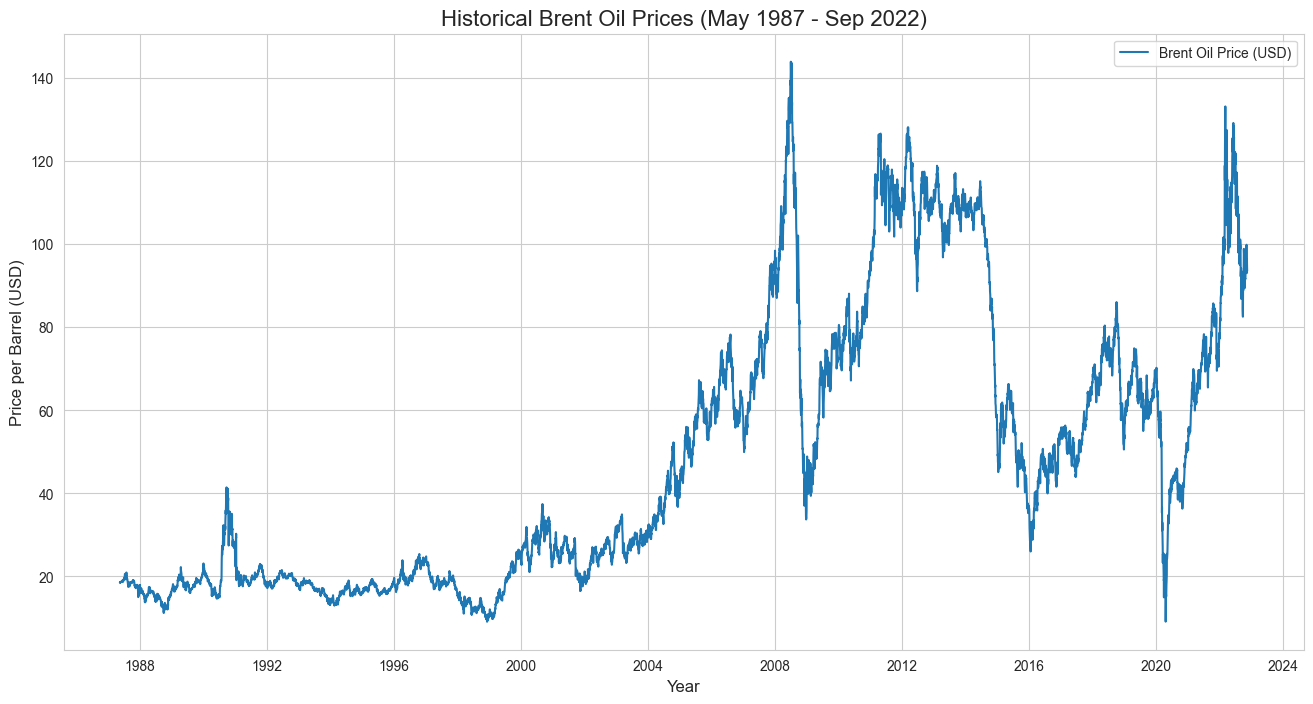

Plot saved to: '../reports\task-1\01_historical_brent_prices.png'

--- Stationarity Test on Raw Price Data ---
ADF Statistic: -1.9939
p-value: 0.2893
Conclusion: The raw price series is NON-STATIONARY (p > 0.05). Transformation is needed.


In [22]:
# RAW PRICE SERIES ANALYSIS & VISUALIZATION ---
print("\nStep 2: Analyzing raw price series...")
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Price'], label='Brent Oil Price (USD)')
plt.title('Historical Brent Oil Prices (May 1987 - Sep 2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price per Barrel (USD)', fontsize=12)
plt.legend()

# Save the plot
plot_path_1 = os.path.join(output_dir, '01_historical_brent_prices.png')
plt.savefig(plot_path_1, bbox_inches='tight')
plt.show()
print(f"Plot saved to: '{plot_path_1}'")

# Perform the Augmented Dickey-Fuller test for stationarity
print("\n--- Stationarity Test on Raw Price Data ---")
adf_result = adfuller(df['Price'].dropna())
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
if adf_result[1] > 0.05:
    print("Conclusion: The raw price series is NON-STATIONARY (p > 0.05). Transformation is needed.")
else:
    print("Conclusion: The raw price series is STATIONARY (p <= 0.05).")

In [ ]:
#. DATA TRANSFORMATION (LOG RETURNS)
print("\nStep 3: Transforming data to log returns...")
df['log_return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))
df.dropna(inplace=True) # Dropped the first row which is now NaN
print("Log returns calculated.")


Step 3: Transforming data to log returns...
Log returns calculated.



Step 4: Analyzing log return series...


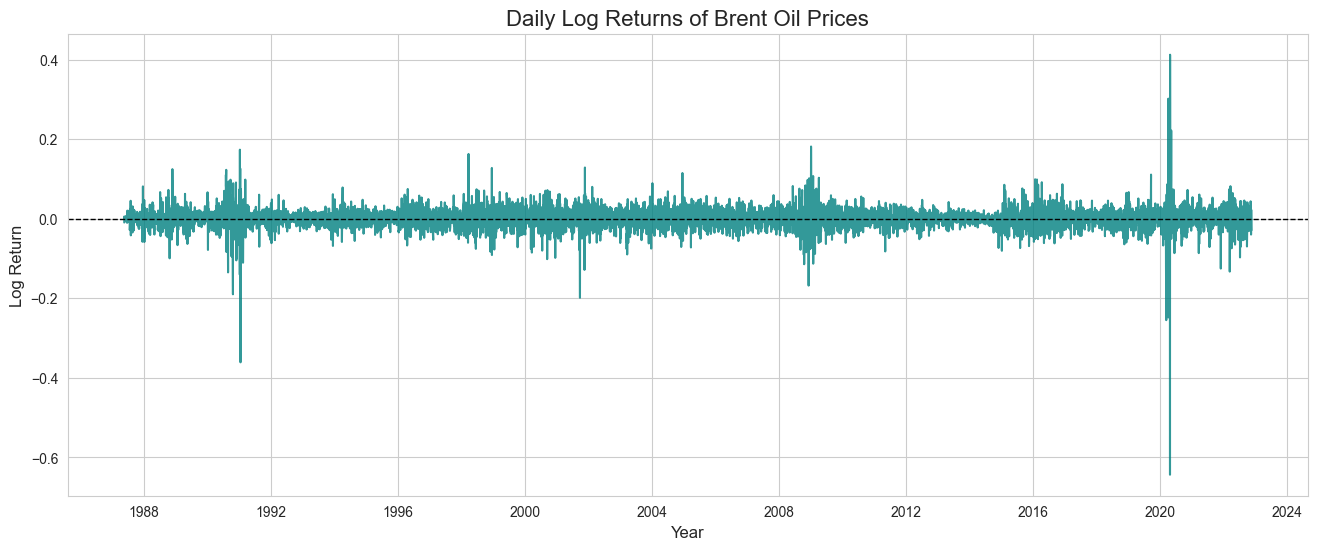

Plot saved to: '../reports\task-1\02_log_returns_series.png'

 Stationarity Test on Log Returns 
ADF Statistic: -16.4271
p-value: 0.0000
Conclusion: The log return series is STATIONARY (p <= 0.05). It is now ready for modeling.


In [25]:
#4. LOG RETURN SERIES ANALYSIS & VISUALIZATION
print("\nStep 4: Analyzing log return series...")
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['log_return'], color='teal', alpha=0.8)
plt.title('Daily Log Returns of Brent Oil Prices', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.axhline(0, color='black', linestyle='--', lw=1)

# Save the plot
plot_path_2 = os.path.join(output_dir, '02_log_returns_series.png')
plt.savefig(plot_path_2, bbox_inches='tight')
plt.show()
print(f"Plot saved to: '{plot_path_2}'")

# Test the log returns for stationarity
print("\n Stationarity Test on Log Returns ")
adf_log_return = adfuller(df['log_return'].dropna())
print(f'ADF Statistic: {adf_log_return[0]:.4f}')
print(f'p-value: {adf_log_return[1]:.4f}')
if adf_log_return[1] > 0.05:
    print("Conclusion: The log return series is NON-STATIONARY (p > 0.05).")
else:
    print("Conclusion: The log return series is STATIONARY (p <= 0.05). It is now ready for modeling.")


Step 5: Compiling and visualizing key events...


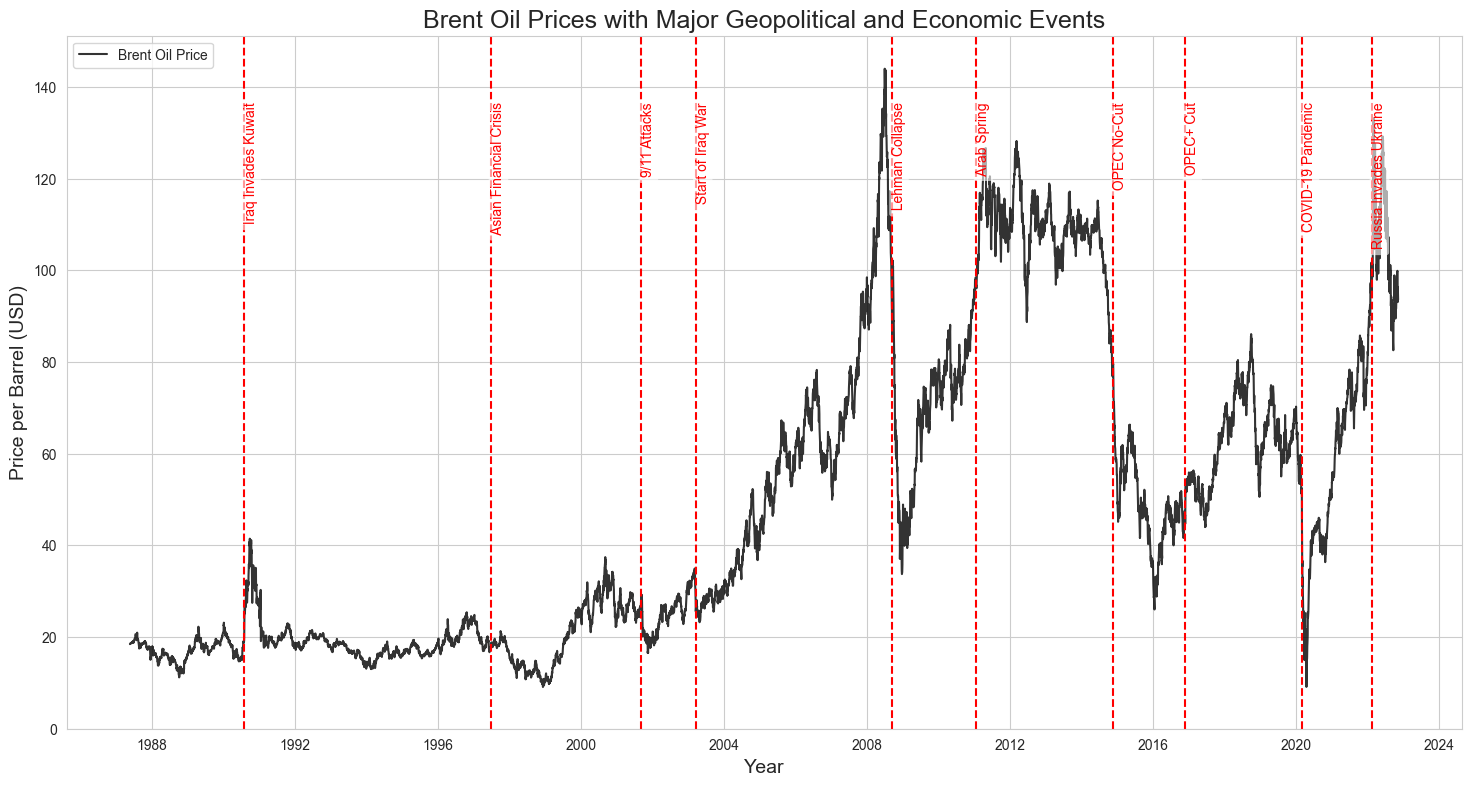

Plot saved to: '../reports\task-1\03_prices_with_key_events.png'


In [26]:
#5. INTEGRATE AND VISUALIZE EVENT DATA 
print("\nStep 5: Compiling and visualizing key events...")
events_data = {
    'EventDate': ['1990-08-02', '1997-07-02', '2001-09-11', '2003-03-20', '2008-09-15', '2011-01-25', '2014-11-27', '2016-11-30', '2020-03-11', '2022-02-24'],
    'EventName': ['Iraq Invades Kuwait', 'Asian Financial Crisis', '9/11 Attacks', 'Start of Iraq War', 'Lehman Collapse', 'Arab Spring', 'OPEC No-Cut', 'OPEC+ Cut', 'COVID-19 Pandemic', 'Russia Invades Ukraine']
}
events_df = pd.DataFrame(events_data)
events_df['EventDate'] = pd.to_datetime(events_df['EventDate'])

# Create the final plot
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(df.index, df['Price'], label='Brent Oil Price', color='k', alpha=0.8, zorder=1)

# Add vertical lines and text for each event
for _, event in events_df.iterrows():
    ax.axvline(x=event['EventDate'], color='red', linestyle='--', lw=1.5, zorder=2)
    ax.text(event['EventDate'], df['Price'].max() * 0.95, f" {event['EventName']}",
            rotation=90, verticalalignment='top', fontsize=10, color='red',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'), zorder=3)

ax.set_title('Brent Oil Prices with Major Geopolitical and Economic Events', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price per Barrel (USD)', fontsize=14)
ax.legend(loc='upper left')
ax.set_ylim(0, df['Price'].max() * 1.05) # Add some padding to the top

# Save the final plot
plot_path_3 = os.path.join(output_dir, '03_prices_with_key_events.png')
plt.savefig(plot_path_3, bbox_inches='tight')
plt.show()
print(f"Plot saved to: '{plot_path_3}'")

In [ ]:
# SAVE THE PROCESSED DATAFRAME 
# This is the new, final step for Task 1.
processed_file_path = os.path.join(output_data_dir, 'brent_prices_processed.csv')
df.to_csv(processed_file_path)

print("TASK 1 COMPLETE")
print(f"Processed DataFrame saved successfully to: '{processed_file_path}'")
print("\nFinal DataFrame Head:")
print(df.head())
print("\nFinal DataFrame Tail:")
print(df.tail())


TASK 1 COMPLETE
Processed DataFrame saved successfully to: '../data\02_processed\brent_prices_processed.csv'

Final DataFrame Head:
            Price  log_return
Date                         
1987-05-21  18.45   -0.009709
1987-05-22  18.55    0.005405
1987-05-25  18.60    0.002692
1987-05-26  18.63    0.001612
1987-05-27  18.60   -0.001612

Final DataFrame Tail:
            Price  log_return
Date                         
2022-11-08  96.85   -0.030706
2022-11-09  93.05   -0.040026
2022-11-10  94.25    0.012814
2022-11-11  96.37    0.022244
2022-11-14  93.59   -0.029271
